In [3]:
import pandas as pd

# 파일 읽기
month_2017 = pd.read_excel('./data/2017_month.xlsx')
month_2018 = pd.read_excel('./data/2018_month.xlsx')
month_2019 = pd.read_excel('./data/2019_month.xlsx')
month_2020 = pd.read_excel('./data/2020_month.xlsx')
month_2021 = pd.read_excel('./data/2021_month.xlsx')

In [5]:
month = pd.concat([month_2017, month_2018, month_2019, month_2020, month_2021], ignore_index=True)
month

,년도,월,순위,타이틀,가수,장르
0,2017,1,1,첫눈처럼 너에게 가겠다,에일리 (AILEE),OST
1,2017,1,2,Beautiful,Crush,OST
2,2017,1,3,당신의 밤 (Feat. 오혁),황광희 & 개코,랩/힙합
3,2017,1,4,좋다고 말해,볼빨간사춘기,인디
4,2017,1,5,오랜 날 오랜 밤,AKMU (악뮤),블루스/포크
...,...,...,...,...,...,...
5595,2021,8,96,살짝 설렜어 (Nonstop),오마이걸 (OH MY GIRL),댄스
5596,2021,8,97,우린 어쩌다 헤어진 걸까,허각,발라드
5597,2021,8,98,너의 번호를 누르고 (Prod. by 영화처럼),#안녕,인디
5598,2021,8,99,비도 오고 그래서 (Feat. 신용재),헤이즈 (Heize),랩/힙합


In [6]:
Spring = month[(month['월']==3) | (month['월']==4) | (month['월']==5)].reset_index(drop=True)
Summer = month[(month['월']==6) | (month['월']==7) | (month['월']==8)].reset_index(drop=True)
Fall = month[(month['월']==9) | (month['월']==10) | (month['월']==11)].reset_index(drop=True)
Winter = month[(month['월']==12) | (month['월']==1) | (month['월']==2)].reset_index(drop=True)

In [7]:
title_spring = list(Spring.drop_duplicates('타이틀')['타이틀'])
title_summer = list(Summer.drop_duplicates('타이틀')['타이틀'])
title_fall = list(Fall.drop_duplicates('타이틀')['타이틀'])
title_winter = list(Winter.drop_duplicates('타이틀')['타이틀'])

In [8]:
# 부제목 제거
for i in range(len(title_spring)):
    title_spring[i] = title_spring[i].split(' (')[0]

for i in range(len(title_summer)):
    title_summer[i] = title_summer[i].split(' (')[0]

for i in range(len(title_fall)):
    title_fall[i] = title_fall[i].split(' (')[0]

for i in range(len(title_winter)):
    title_winter[i] = title_winter[i].split(' (')[0]

In [19]:
from konlpy.tag import Komoran
import re
import pandas as pd

komoran = Komoran()
text_list = []

for title in title_spring:
    text_list.extend(komoran.nouns(title))

word_list = pd.Series(text_list)
result_spring = word_list.value_counts()

In [20]:
from konlpy.tag import Komoran
import re
import pandas as pd

komoram = Komoran()
text_list = []

for title in title_summer:
    text_list.extend(komoran.nouns(title))

word_list = pd.Series(text_list)
result_summer = word_list.value_counts()

In [21]:
from konlpy.tag import Komoran
import re
import pandas as pd

komoram = Komoran()
text_list = []

for title in title_fall:
    text_list.extend(komoran.nouns(title))

word_list = pd.Series(text_list)
result_fall = word_list.value_counts()

In [22]:
from konlpy.tag import Komoran
import re
import pandas as pd

komoram = Komoran()
text_list = []

for title in title_winter:
    text_list.extend(komoran.nouns(title))

word_list = pd.Series(text_list)
result_winter = word_list.value_counts()

(-0.5, 999.5, 999.5, -0.5)

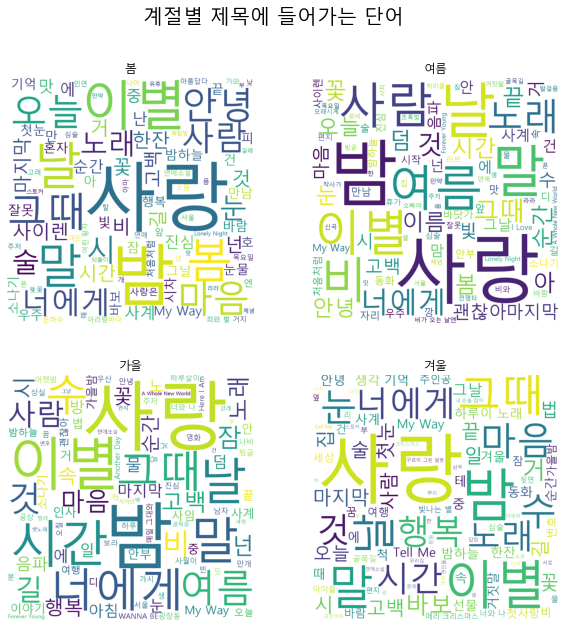

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

wc = WordCloud(font_path='‪C:\Windows\Fonts\malgun.ttf', 
               background_color='white',
               width=1000,
               height=1000,
               max_words=100,
               max_font_size=300)

plt.figure(figsize=(10,10))
plt.suptitle('계절별 제목에 들어가는 단어',fontsize=20)

wc.generate_from_frequencies(dict(result_spring))
plt.subplot(2,2,1)
plt.imshow(wc)
plt.title('봄')
plt.axis('off')

wc.generate_from_frequencies(dict(result_summer))
plt.subplot(2,2,2)
plt.imshow(wc)
plt.title('여름')
plt.axis('off')

wc.generate_from_frequencies(dict(result_fall))
plt.subplot(2,2,3)
plt.imshow(wc)
plt.title('가을')
plt.axis('off')

wc.generate_from_frequencies(dict(result_winter))
plt.subplot(2,2,4)
plt.imshow(wc)
plt.title('겨울')
plt.axis('off')